<a href="https://colab.research.google.com/github/Harshitgupta1023/Glass-vs-NoGlass-Classification/blob/main/Glass_vs_NoGlass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Major Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import shutil
import random
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Data Loading

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Data_set/Kaggle"

In [ ]:
!kaggle datasets download -d jeffheaton/glasses-or-no-glasses

In [ ]:
!unzip /content/glasses-or-no-glasses.zip -d /content/drive/MyDrive/Data_set/Proj

# Dataset

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Data_set/Proj/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data_set/Proj/test.csv')

In [ ]:
df_train.head()

id       v1       v2       v3  ...     v510     v511     v512  glasses
0   1  0.37797 -0.94808  0.01346  ...  1.08635  1.69027  0.61609        0
1   2  0.07609 -0.09774  0.39666  ...  0.00866 -1.27640 -0.60496        1
2   3  1.19391 -0.68707 -0.68422  ... -0.60177  0.43555  0.41982        1
3   4  1.34949 -0.31498 -1.30248  ...  0.83997 -0.46986  0.06755        0
4   5 -0.03512 -0.34196  0.14230  ...  0.83641  0.59756 -0.20298        0

[5 rows x 514 columns]

In [ ]:
df_test.head()

id       v1       v2       v3  ...     v509     v510     v511     v512
0  4501  0.48039 -0.32247 -0.44262  ...  0.30127 -0.65184 -0.25504  0.51825
1  4502  1.65497 -0.40396 -0.87412  ...  0.58029 -0.44552  0.40221  1.44524
2  4503  0.66835 -0.88843 -1.03717  ... -1.68200  1.34367 -0.03853  1.13161
3  4504  0.07134 -1.13284 -1.13902  ... -0.17401  0.07702 -0.00753  0.71057
4  4505  0.14553 -0.06097 -0.58112  ...  0.20894 -1.08812 -0.90550 -0.38300

[5 rows x 513 columns]

# Data Preparation

In [ ]:
df_train['glasses'][56]

0

Example image

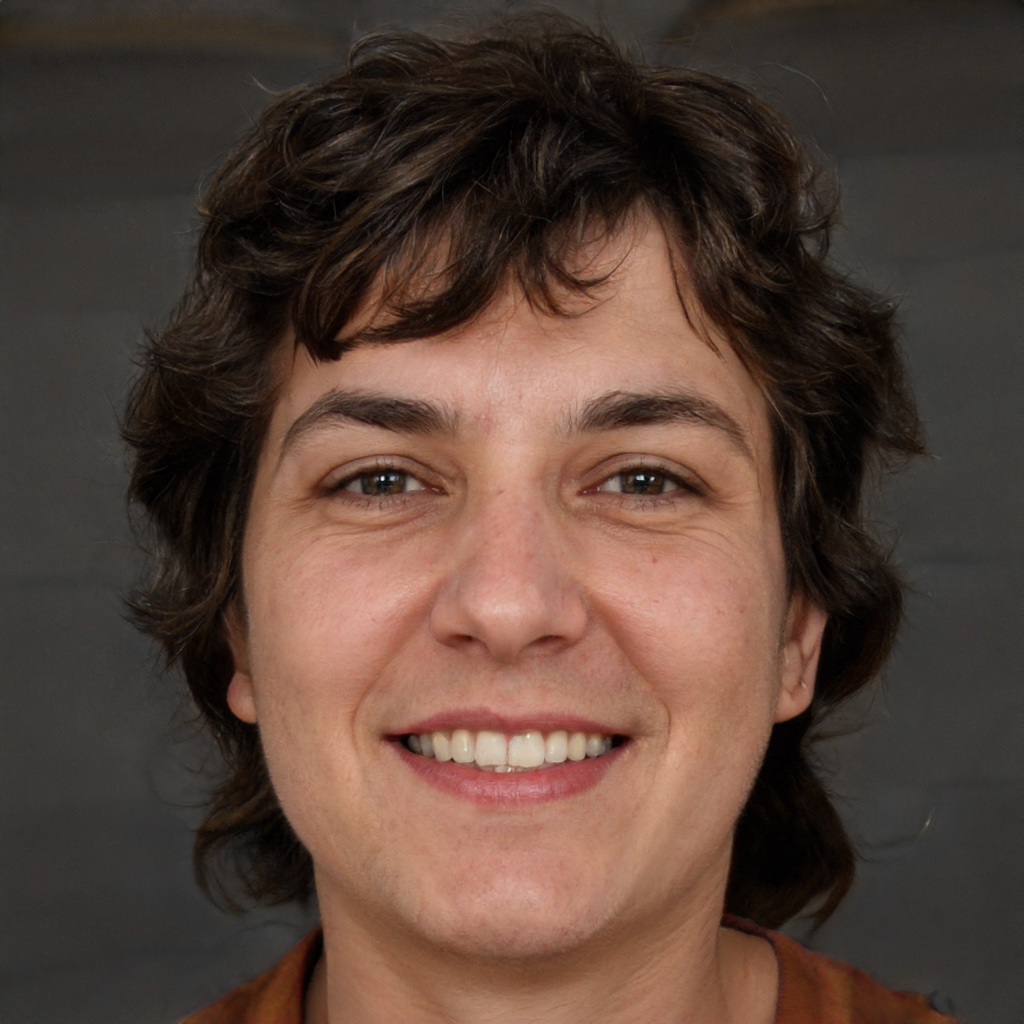

In [ ]:
from IPython.display import Image
display(Image("/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-57.png"))

sepearting glass/no-glass images 

In [ ]:
train_size = 0.8*len(df_train["glasses"])
val_size =  0.2*len(df_train["glasses"])
                    
print('Length of training + validation set', len(df_train["glasses"]))
print('Length of training set', train_size)
print('Length of validation set',val_size)

Length of training + validation set 4500
Length of training set 3600.0
Length of validation set 900.0


In [ ]:
#validation Set
with_glass_validation = []
without_glass_validation = []
glass_validation = []
for i in range(0,int(val_size)):
    a = "/content/drive/MyDrive/Data_set/Proj-validation/faces-spring-2020/faces-spring-2020/face-"+str(i+1)+".png"
    glass_validation.append(a)
    if df_train["glasses"][i] == 0 :
        without_glass_validation.append(a)
    else:
        with_glass_validation.append(a)

In [ ]:
import glob
import shutil
import os

src_dir = "/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020"
dst_dir_g = "/content/drive/MyDrive/Data_set/Proj/glass"
dst_dir_ng = "/content/drive/MyDrive/Data_set/Proj/no_glass"
i = 0
for pngfile in glob.iglob(os.path.join(src_dir, "*.png")):
  if i == 4500:
    break
  else:
    if df_train["glasses"][i] == 0:
      dst_dir = dst_dir_ng
    else:
      dst_dir = dst_dir_g
    shutil.copy(pngfile, dst_dir)
  i += 1

In [ ]:
import glob
import shutil
import os

src_dir = "/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020"
dst_dir_train_g = "/content/drive/MyDrive/Data_set/Proj/train/glass"
dst_dir_valid_g = "/content/drive/MyDrive/Data_set/Proj/validation/glass"
dst_dir_train_ng = "/content/drive/MyDrive/Data_set/Proj/train/no_glass"
dst_dir_valid_ng = "/content/drive/MyDrive/Data_set/Proj/validation/no_glass"
dst_dir_test = "/content/drive/MyDrive/Data_set/Proj/test"

i = 0
train = 0
valid = 0
test = 0
for pngfile in glob.iglob(os.path.join(src_dir, "*.png")):
	i+=1
	a = int(pngfile.split("/")[-1].split("-")[-1].split(".")[0])
	a = a-1
	if a >= 4500 and test<=500:
		test+=1
		dst_dir = dst_dir_test
	else:
		if train <= 3600 :
			train+=1
			if df_train["glasses"][a] == 0:
				dst_dir = dst_dir_train_ng
			else:
				dst_dir = dst_dir_train_g
		elif train>3600 and valid<=900:
			valid+=1
			if df_train["glasses"][a] == 0:
				dst_dir = dst_dir_valid_ng
			else:
				dst_dir = dst_dir_valid_g
		#print(i,a,df_train['glasses'][a])
	shutil.copy(pngfile, dst_dir)

print(train+valid)

In [ ]:
with_glass_train = []
without_glass_train = []

for i in range(int(val_size) , len(df_train["glasses"])):
    a = "/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-"+str(i+1)+".png"
    if df_train["glasses"][i] == 0 :
        without_glass_train.append(a)
    else:
        with_glass_train.append(a)

In [ ]:
with_glasses = []
without_glasses = []
for i in range(len(df_train["glasses"])):
    a = "face-"+str(i+1)
    if df_train["glasses"][i] == 0 :
        without_glasses.append(a)
    else:
        with_glasses.append(a)

# Data Preprocessing


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
dst_dir_train_g = "/content/drive/MyDrive/Data_set/Proj/train/glass"
dst_dir_valid_g = "/content/drive/MyDrive/Data_set/Proj/validation/glass"
dst_dir_train_ng = "/content/drive/MyDrive/Data_set/Proj/train/no _glass"
dst_dir_valid_ng = "/content/drive/MyDrive/Data_set/Proj/validation/no_glass"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_set/Proj/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3601 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_set/Proj/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 899 images belonging to 2 classes.


In [ ]:
col = df_train.columns
features = col[1:-1]
target = col[-1]

X = df_train[features]
Y = df_train[target]

from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
col_test = df_test.columns
features_test = col_test[1:]
X_test = df_test[features_test]

Standardized

In [ ]:
X_train_std = StandardScaler().fit_transform(X_train)
X_val_std = StandardScaler().fit_transform(X_val)
X_test_std = StandardScaler().fit_transform(X_test)

LDA Data (dimesnionality reduction)

In [ ]:
lda = LDA()
lda_data = lda.fit_transform(X, Y)
X_train_lda, X_val_lda, Y_train_lda, Y_val_lda = train_test_split(lda_data, Y, test_size=0.2, random_state=1)

# Test Cases

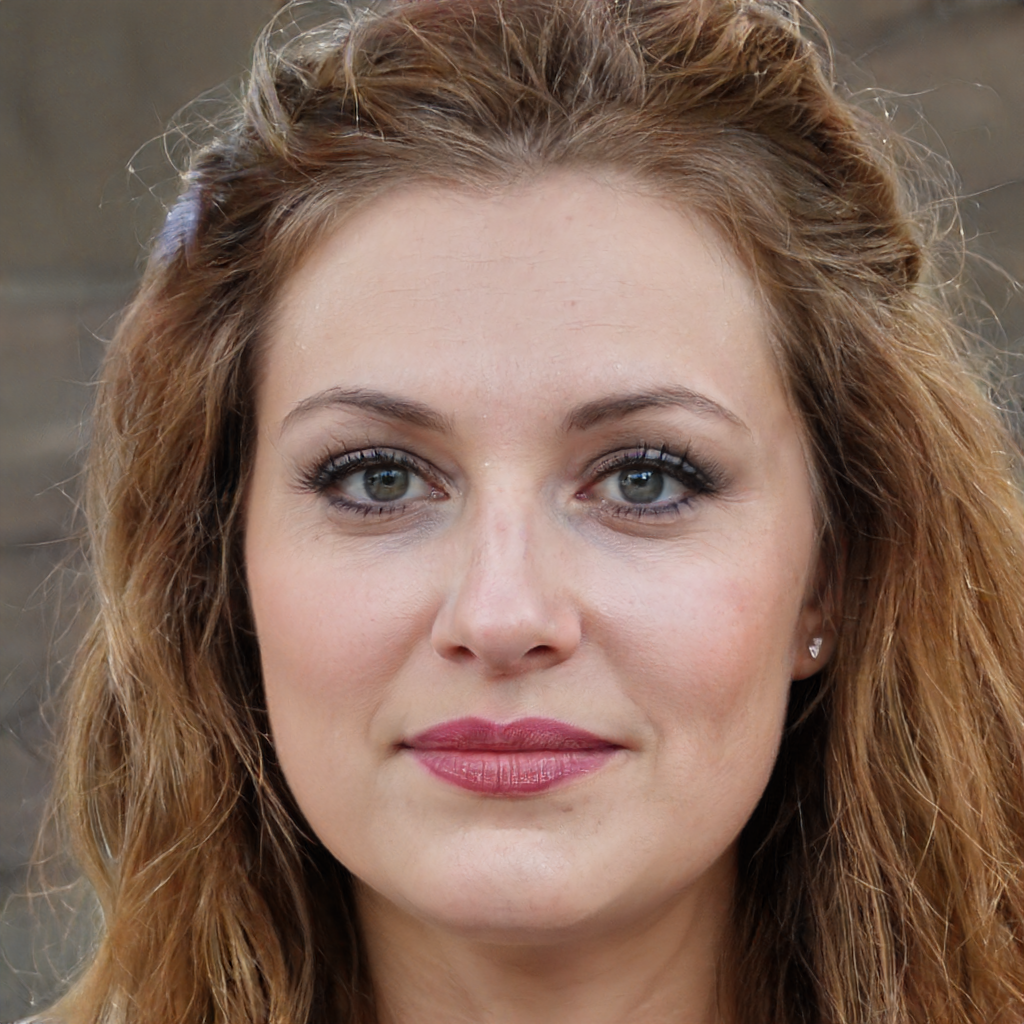

In [ ]:
from IPython.display import Image
display(Image("/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-4512.png"))

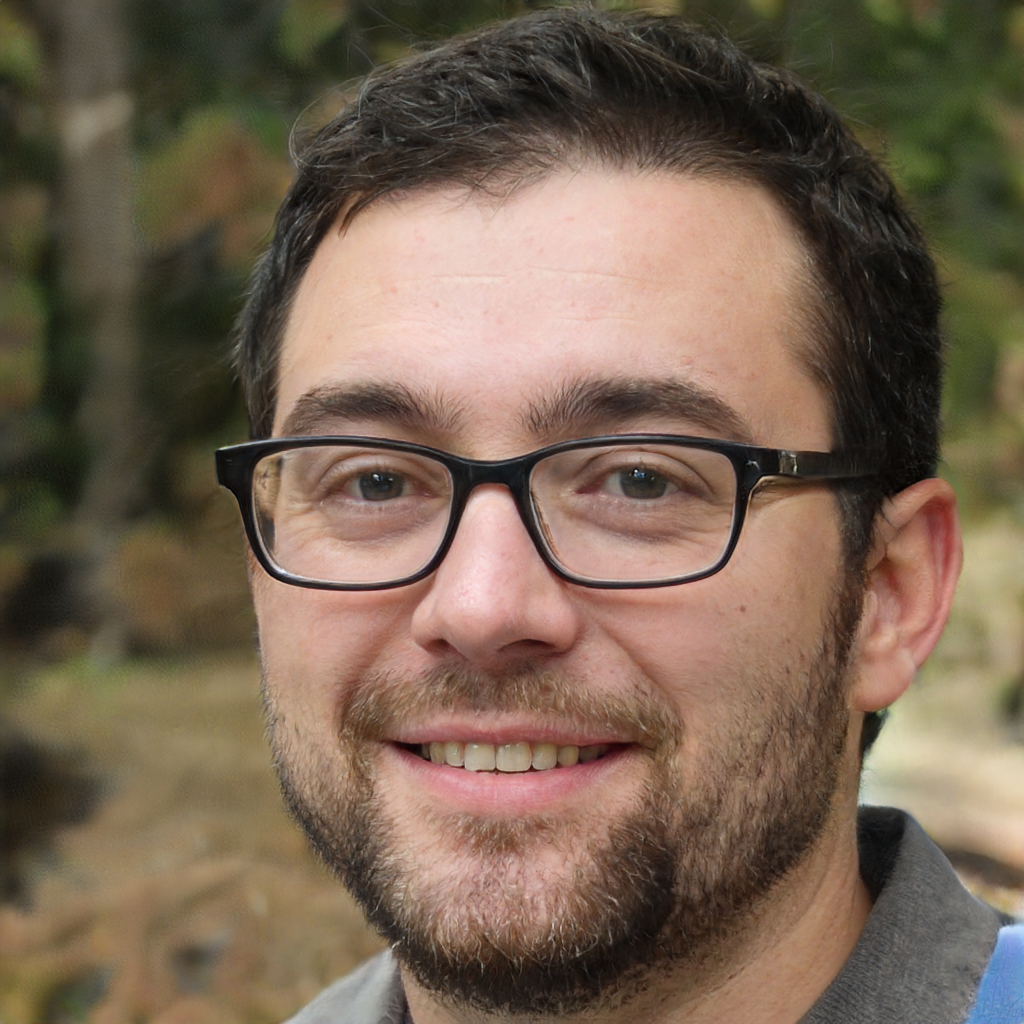

In [ ]:
from IPython.display import Image
display(Image("/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-4559.png"))

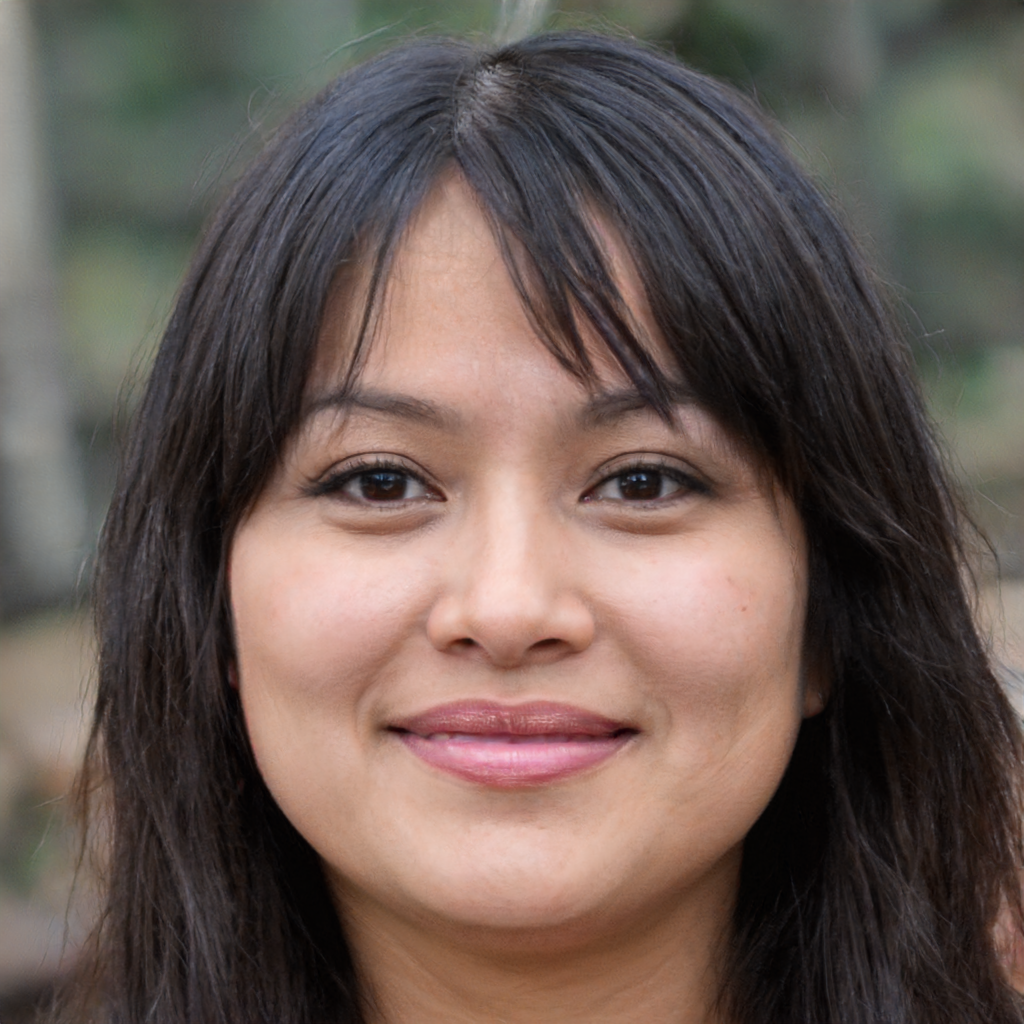

In [ ]:
from IPython.display import Image
display(Image("/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-4577.png"))

Real Values - 
1. Test image - 4512 : No glass (0)
2. Test image - 4559 : Glass (1)
3. Test image - 4577 : No glass (0)

In [ ]:
X_test_4512 = X_test.loc[df_test['id'] == 4512]
X_test_4559 = X_test.loc[df_test['id'] == 4559]
X_test_4577 = X_test.loc[df_test['id'] == 4577]

# MLP

MLP on normal data

In [ ]:
mlp_og = MLPClassifier(random_state=1, max_iter=300).fit(X_train , Y_train)

In [ ]:
Y_pred_og = mlp_og.predict(X_val)

print('For Multilayer-perceptron on normal Data -')
print("The Precision :", precision_score(Y_val, Y_pred_og))
print("The Recall :", recall_score(Y_val, Y_pred_og))
print("The F1 score :", f1_score(Y_val, Y_pred_og))
print("The Accuracy :", accuracy_score(Y_val, Y_pred_og))
print("\nConfusion matrix :")
print( confusion_matrix(Y_val,Y_pred_og))
print('\nClassification report : ')
print(classification_report(Y_val, Y_pred_og))

For Multilayer-perceptron on normal Data -
The Precision : 0.984375
The Recall : 1.0
The F1 score : 0.9921259842519685
The Accuracy : 0.99

Confusion matrix :
[[324   9]
 [  0 567]]

Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       333
           1       0.98      1.00      0.99       567

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



In [ ]:
Y_pred_mlp_og_4512 = mlp_og.predict(X_test)
Y_pred_mlp_og_4559 = mlp_og.predict(X_test)
Y_pred_mlp_og_4577 = mlp_og.predict(X_test)

print('The predicted values of images for Multilayer-perceptron on normal Data: \n1. 4512: ' , Y_pred_mlp_og_4512 , '\n2. 4559: ' , Y_pred_mlp_og_4559 , '\n3. 4577: ' , Y_pred_mlp_og_4577)

The predicted values of images for Multilayer-perceptron on normal Data: 
1. 4512:  0 
2. 4559:  1 
3. 4577:  0


MLP By dimensionality reduction


In [ ]:
mlp_dim = MLPClassifier(random_state=1, max_iter=300).fit(X_train_lda , Y_train)
Y_pred_dim = mlp_dim.predict(X_val_lda)

In [ ]:
print('For Multilayer-perceptron on dimensionaly reduced Data -')
print("The Precision :", precision_score(Y_val, Y_pred_dim))
print("The Recall :", recall_score(Y_val, Y_pred_dim))
print("The F1 score :", f1_score(Y_val, Y_pred_dim))
print("The Accuracy :", accuracy_score(Y_val, Y_pred_dim))
print("\nConfusion matrix :")
print( confusion_matrix(Y_val,Y_pred_dim))
print('\nClassification report : ')
print(classification_report(Y_val, Y_pred_dim))

For Multilayer-perceptron on normal Data -
The Precision : 0.9912587412587412
The Recall : 1.0
The F1 score : 0.9956101843722563
The Accuracy : 0.9944444444444445

Confusion matrix :
[[328   5]
 [  0 567]]

Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       333
           1       0.99      1.00      1.00       567

    accuracy                           0.99       900
   macro avg       1.00      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



MLP By Feature Selection

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


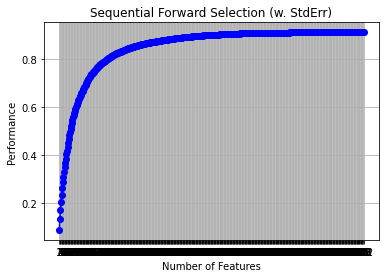

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(LinearRegression(),k_features=(3,X_train.shape[1]),forward=True, floating=False,cv=0)
sfs1.fit(X_train, Y_train)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Approximately first 150 features

In [ ]:
sfs_for = SFS(MLPClassifier(random_state=1, max_iter=300),k_features=150,forward=True, floating=False,cv=0)
sfs_for.fit(X_train, Y_train)

In [ ]:
X_train_fs = sfs_for.transform(X_train)
X_test_fs = sfs_for.transform(X_val)

mlp_fs = MLPClassifier(random_state=1, max_iter=300).fit(X_train_fs, Y_train)
Y_pred_mlp_fs = mlp_fs.predict(X_test_fs)

In [ ]:
print('For Multilayer-perceptron Forward Selection(Wrapper Method):')
print("The Precision :", precision_score(Y_val, Y_pred_mlp_fs))
print("The Recall :", recall_score(Y_val, Y_pred_mlp_fs))
print("The F1 score :", f1_score(Y_val, Y_pred_mlp_fs))
print("The Accuracy :", accuracy_score(Y_val, Y_pred_mlp_fs))
print("\nConfusion matrix :")
print( confusion_matrix(Y_val,Y_pred_mlp_fs))
print('The Classification Report is: ')
print(classification_report(Y_val, Y_pred_mlp_fs))

For Forward Selection(Wrapper Method):
The Precision : 0.9792746113989638
The Recall : 1.0
The F1 score : 0.9895287958115184
The Accuracy : 0.9866666666666667

Confusion matrix :
[[321  12]
 [  0 567]]
The Classification Report is: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       333
           1       0.98      1.00      0.99       567

    accuracy                           0.99       900
   macro avg       0.99      0.98      0.99       900
weighted avg       0.99      0.99      0.99       900



In [ ]:
X_test_case_fs = sfs_for.transform(X_test)

X_test_4512_fs = X_test_case_fs.loc[df_test['id'] == 4512]
X_test_4559_fs = X_test_case_fs.loc[df_test['id'] == 4559]
X_test_4577_fs = X_test_case_fs.loc[df_test['id'] == 4577]

In [ ]:
Y_pred_mlp_fs_4512 = mlp_fs.predict(X_test_4512_fs)
Y_pred_mlp_fs_4559 = mlp_fs.predict(X_test_4559_fs)
Y_pred_mlp_fs_4577 = mlp_fs.predict(X_test_4577_fs)

print('The predicted values of images for MLP Forward Selection(Wrapper Method): \n1. 4512: ' , Y_pred_mlp_fs_4512 , '\n2. 4559: ' , Y_pred_mlp_fs_4559 , '\n3. 4577: ' , Y_pred_mlp_fs_4577)

The predicted values of images for MLP Forward Selection(Wrapper Method): 
1. 4512:  0 
2. 4559:  1 
3. 4577:  0


# Support Vector Machine


SVM on normal data

In [ ]:
svm1 = svm.SVC(kernel='linear', C = 0.01)
svm1.fit(X_train  , Y_train)

Y_pred_svm_og = svm1.predict(X_val)

In [ ]:
print('For Support Vector Machine on normal Data -')
print("The Precision :", precision_score(Y_val, Y_pred_svm_og))
print("The Recall :", recall_score(Y_val, Y_pred_svm_og))
print("The F1 score :", f1_score(Y_val, Y_pred_svm_og))
print("The Accuracy :", accuracy_score(Y_val, Y_pred_svm_og))
print("\nConfusion matrix :")
print( confusion_matrix(Y_val,Y_pred_svm_og))
print('\nClassification report : ')
print(classification_report(Y_val, Y_pred_svm_og))

For Support Vector Machine on normal Data -
The Precision : 0.9826689774696707
The Recall : 1.0
The F1 score : 0.9912587412587412
The Accuracy : 0.9888888888888889

Confusion matrix :
[[323  10]
 [  0 567]]

Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       333
           1       0.98      1.00      0.99       567

    accuracy                           0.99       900
   macro avg       0.99      0.98      0.99       900
weighted avg       0.99      0.99      0.99       900



In [ ]:
Y_pred_svm_og_4512 = svm1.predict(X_test_4512)
Y_pred_svm_og_4559 = svm1.predict(X_test_4559)
Y_pred_svm_og_4577 = svm1.predict(X_test_4577)

print('The predicted values of images for Support Vector Machine on normal Data: \n1. 4512: ' , Y_pred_svm_og_4512 , '\n2. 4559: ' , Y_pred_svm_og_4559 , '\n3. 4577: ' , Y_pred_svm_og_4577)

The predicted values of images for Support Vector Machine on normal Data: 
1. 4512:  0 
2. 4559:  1 
3. 4577:  0


SVM By dimensionality reduction


In [ ]:
svm_dim = svm.SVC(kernel='linear', C = 0.01).fit(X_train_lda , Y_train_lda)
Y_pred_dim_lda = svm_dim.predict(X_val_lda)

In [ ]:
print('For Support Vector Machine on dimensionaly reduced Data -')
print("The Precision :", precision_score(Y_val, Y_pred_dim_lda))
print("The Recall :", recall_score(Y_val, Y_pred_dim_lda))
print("The F1 score :", f1_score(Y_val, Y_pred_dim_lda))
print("The Accuracy :", accuracy_score(Y_val, Y_pred_dim_lda))
print("\nConfusion matrix :")
print( confusion_matrix(Y_val,Y_pred_dim_lda))
print('\nClassification report : ')
print(classification_report(Y_val, Y_pred_dim_lda))

For Support Vector Machine on dimensionaly reduced Data -
The Precision : 0.9947368421052631
The Recall : 1.0
The F1 score : 0.9973614775725593
The Accuracy : 0.9966666666666667

Confusion matrix :
[[330   3]
 [  0 567]]

Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       333
           1       0.99      1.00      1.00       567

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



SVM By Feature Selection

In [ ]:

sfs1 = SFS(svm.SVC(),k_features=(3,X_train.shape[1]),forward=True, floating=False,cv=0)
sfs1.fit(X_train, Y_train)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Approximately first 150 features

In [ ]:
sfs_svm = SFS(svm.SVC(),k_features=150,forward=True, floating=False,cv=0)
sfs_svm.fit(X_train, Y_train)

In [ ]:
X_train_svm = sfs_svm.transform(X_train)
X_test_svm = sfs_svm.transform(X_val)

svm_fs_svm = svm.SVC(kernel='linear', C = 0.01).fit(X_train_svm, Y_train)
Y_pred_svm = svm_fs_svm.predict(X_test_svm)

In [ ]:
print('For Support Vector Machine on Feature Selection (Forward Selection):')
print("The Precision :", precision_score(Y_val, Y_pred_svm))
print("The Recall :", recall_score(Y_val, Y_pred_svm))
print("The F1 score :", f1_score(Y_val, Y_pred_svm))
print("The Accuracy :", accuracy_score(Y_val, Y_pred_svm))
print("\nConfusion matrix :")
print( confusion_matrix(Y_val,Y_pred_svm))
print('The Classification Report is: ')
print(classification_report(Y_val, Y_pred_svm))

# K-Nearest Neighbors


K-Nearest Neighbors on normal data

In [ ]:
knn_og = KNeighborsClassifier()
knn_og.fit(X_train,Y_train)
Y_pred_knn_og = knn_og.predict(X_val)

In [ ]:
print('For K-Nearest Neighbors on normal Data -')
print("The Precision :", precision_score(Y_val, Y_pred_knn_og))
print("The Recall :", recall_score(Y_val, Y_pred_knn_og))
print("The F1 score :", f1_score(Y_val, Y_pred_knn_og))
print("The Accuracy :", accuracy_score(Y_val, Y_pred_knn_og))
print("\nConfusion matrix :")
print( confusion_matrix(Y_val,Y_pred_knn_og))
print('\nClassification report : ')
print(classification_report(Y_val, Y_pred_knn_og))

For K-Nearest Neighbors on normal Data -
The Precision : 0.9895287958115183
The Recall : 1.0
The F1 score : 0.9947368421052631
The Accuracy : 0.9933333333333333

Confusion matrix :
[[327   6]
 [  0 567]]

Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       333
           1       0.99      1.00      0.99       567

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



In [ ]:
Y_pred_knn_og_4512 = knn_og.predict(X_test)
Y_pred_knn_og_4559 = knn_og.predict(X_test)
Y_pred_knn_og_4577 = knn_og.predict(X_test)

print('The predicted values of images for K-Nearest Neighbors on normal Data: \n1. 4512: ' , Y_pred_knn_og_4512 , '\n2. 4559: ' , Y_pred_knn_og_4559 , '\n3. 4577: ' , Y_pred_knn_og_4577)

The predicted values of images for K-Nearest Neighbors on normal Data: 
1. 4512:  0 
2. 4559:  1 
3. 4577:  0


K-Nearest Neighbors By dimensionality reduction


In [ ]:
knn_dim = KNeighborsClassifier()
knn_dim.fit(X_train_lda,Y_train)
Y_pred_knn_lda = knn_dim.predict(X_val_lda)

In [ ]:
print('For K-Nearest Neighbors on dimensionaly reduced Data -')
print("The Precision :", precision_score(Y_val, Y_pred_knn_lda))
print("The Recall :", recall_score(Y_val, Y_pred_knn_lda))
print("The F1 score :", f1_score(Y_val, Y_pred_knn_lda))
print("The Accuracy :", accuracy_score(Y_val, Y_pred_knn_lda))
print("\nConfusion matrix :")
print( confusion_matrix(Y_val,Y_pred_knn_lda))
print('\nClassification report : ')
print(classification_report(Y_val, Y_pred_knn_lda))

For K-Nearest Neighbors on dimensionaly reduced Data -
The Precision : 0.9982394366197183
The Recall : 1.0
The F1 score : 0.9991189427312775
The Accuracy : 0.9988888888888889

Confusion matrix :
[[332   1]
 [  0 567]]

Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       567

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



K-Nearest Neighbors By Feature Selection

In [ ]:
sfs_knn = SFS(KNeighborsClassifier(),k_features=150,forward=True, floating=False,cv=0)
sfs_knn.fit(X_train, Y_train)

In [ ]:
X_train_knn = sfs_knn.transform(X_train)
X_test_knn = sfs_knn.transform(X_val)

knn_fs = knn(n_clusters=2, random_state=0).fit(X_train_knn)
Y_pred_knn_fs = knn_fs.predict(X_test_knn)

In [ ]:
print('For K-Nearest Neighbors on Feature Selection(Forward Selection):')
print("The Precision :", precision_score(Y_val, Y_pred_knn_fs))
print("The Recall :", recall_score(Y_val, Y_pred_knn_fs))
print("The F1 score :", f1_score(Y_val, Y_pred_knn_fs))
print("The Accuracy :", accuracy_score(Y_val, Y_pred_knn_fs))
print("\nConfusion matrix :")
print( confusion_matrix(Y_val,Y_pred_knn_fs))
print('The Classification Report is: ')
print(classification_report(Y_val, Y_pred_knn_fs))

# CNN

Building CNN

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

Compiling CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
113/113 [==============================] - 4687s 42s/step - loss: 0.5916 - accuracy: 0.6767 - val_loss: 0.3811 - val_accuracy: 0.8521
Epoch 2/10
113/113 [==============================] - 284s 3s/step - loss: 0.3870 - accuracy: 0.8348 - val_loss: 0.3526 - val_accuracy: 0.8509
Epoch 3/10
113/113 [==============================] - 284s 3s/step - loss: 0.3357 - accuracy: 0.8506 - val_loss: 0.3214 - val_accuracy: 0.8732
Epoch 4/10
113/113 [==============================] - 277s 2s/step - loss: 0.3250 - accuracy: 0.8753 - val_loss: 0.3247 - val_accuracy: 0.8710
Epoch 5/10
113/113 [==============================] - 282s 2s/step - loss: 0.3376 - accuracy: 0.8642 - val_loss: 0.3551 - val_accuracy: 0.8699
Epoch 6/10
113/113 [==============================] - 276s 2s/step - loss: 0.3209 - accuracy: 0.8751 - val_loss: 0.3292 - val_accuracy: 0.8788
Epoch 7/10
113/113 [==============================] - 281s 2s/step - loss: 0.2961 - accuracy: 0.8800 - val_loss: 0.3196 - val_accuracy: 0.87

total time 1 hour 8 min


In [ ]:
label_map = (training_set.class_indices)
label_map

{'glass': 0, 'no_glass': 1}

In [ ]:
cnn.save("/content/drive/MyDrive/Data_set/Proj/cnn_second_try.h5")